In [65]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

## Reading in all the trade and market data for round 1

In [134]:
price_day_m1 = pd.read_csv('data/prices_round_1_day_-1.csv', sep = ';')
price_day_m2 = pd.read_csv('data/prices_round_1_day_-2.csv', sep = ';')
price_day_0 = pd.read_csv('data/prices_round_1_day_0.csv', sep = ';')
trades_day_m1 = pd.read_csv('data/trades_round_1_day_-1.csv', sep = ';')
trades_day_m2 = pd.read_csv('data/trades_round_1_day_-2.csv', sep = ';')
trades_day_0 = pd.read_csv('data/trades_round_1_day_0.csv', sep = ';')

# Store all trades and price dataframes in a list
prices = [price_day_0, price_day_m1, price_day_m2]
trades = [trades_day_0, trades_day_m1, trades_day_m2]

In [138]:
trades_day_0['day'] = 0
trades_day_m1['day'] = -1
trades_day_m2['day'] = -2

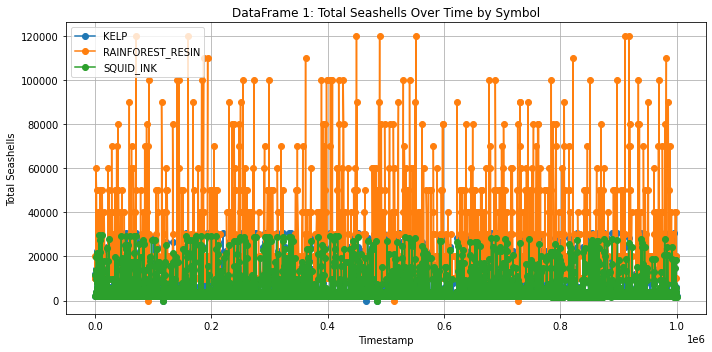

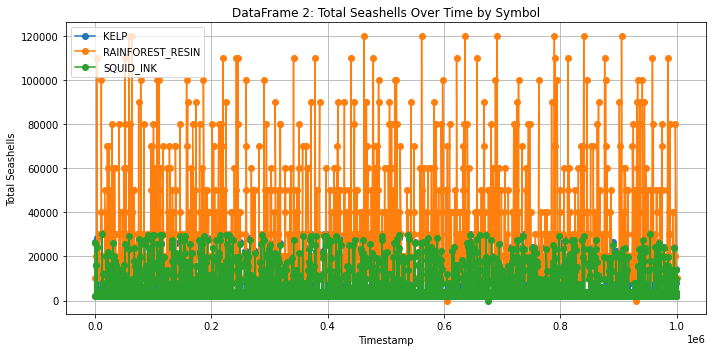

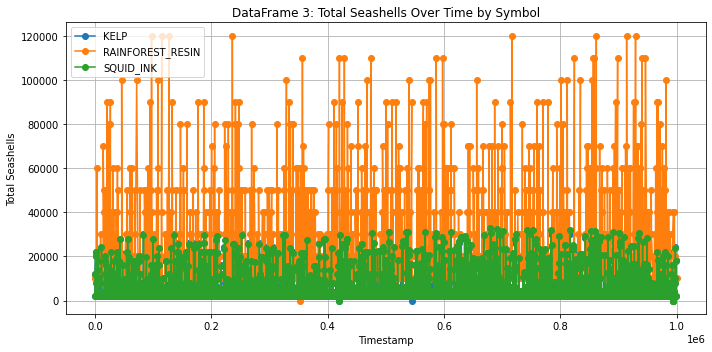

In [139]:
# Merge price and quantity and visualse for trades
for df in trades:
    df['total_seashells'] = df['quantity'] * df['price']

# visualise the total seashells across timestamp for resin, kelp and ink

for idx, df in enumerate(trades, start=1):
    plt.figure(figsize=(10, 5))  # Create a new figure for each DataFrame
    
    # Group the DataFrame by 'symbol'
    grouped = df.groupby('symbol')
    
    # Iterate over each group (symbol)
    for symbol, group in grouped:
        # It's a good idea to sort by timestamp if the data isn't already sorted
        group_sorted = group.sort_values(by='timestamp')
        plt.plot(group_sorted['timestamp'], group_sorted['total_seashells'],
                 marker='o', label=symbol)
    
    # Labeling the axes and the plot
    plt.xlabel('Timestamp')
    plt.ylabel('Total Seashells')
    plt.title(f'DataFrame {idx}: Total Seashells Over Time by Symbol')
    plt.legend()
    plt.grid(True)  # Optional, to add a grid for easier reading
    plt.tight_layout()
    plt.show()

## How often do prices/quotes raise/fall to any given threshold?

We want to answer the question above.

Assuming a mean reverting price process with mean 10'000 for kelp a buy-low/sell-high strategy has to decide the following:
- buy at what price and quantity
- sell at what price and quantity

Questions:
- How much profit per round trip?
- How often does opportunity occur?
- Is sufficient volume available?

In [140]:
prices[0].head()


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,RAINFOREST_RESIN,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0
1,0,0,KELP,2028,30,NaN,NaN,NaN,NaN,2032,30,NaN,NaN,NaN,NaN,2030.0,0.0
2,0,0,SQUID_INK,1968,30,NaN,NaN,NaN,NaN,1971,30,NaN,NaN,NaN,NaN,1969.5,0.0
3,0,100,SQUID_INK,1969,4,1967.0,31.0,NaN,NaN,1971,31,NaN,NaN,NaN,NaN,1970.0,0.0
4,0,100,KELP,2030,4,2028.0,31.0,NaN,NaN,2032,31,NaN,NaN,NaN,NaN,2031.0,0.0


In [141]:
trades[0].head()

,timestamp,buyer,seller,symbol,currency,price,quantity,day,total_seashells
0,100,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,10002.0,1,0,10002.0
1,300,NaN,NaN,KELP,SEASHELLS,2029.0,6,0,12174.0
2,300,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,9998.0,2,0,19996.0
3,300,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,9998.0,1,0,9998.0
4,300,NaN,NaN,SQUID_INK,SEASHELLS,1965.0,6,0,11790.0


In [142]:
for i, df in enumerate(trades)

SyntaxError: invalid syntax (<ipython-input-142-b82ceec06ee0>, line 1)

In [143]:
prices_resin = [
    df.query('product == "RAINFOREST_RESIN"') for df in prices
]
trades_resin = [
    df.query('symbol == "RAINFOREST_RESIN"') for df in trades
]
print(prices_resin)


[       day  timestamp           product  bid_price_1  bid_volume_1  \
0        0          0  RAINFOREST_RESIN         9998             1   
5        0        100  RAINFOREST_RESIN         9996             1   
7        0        200  RAINFOREST_RESIN         9996             1   
11       0        300  RAINFOREST_RESIN         9996             2   
12       0        400  RAINFOREST_RESIN         9998             5   
...    ...        ...               ...          ...           ...   
29985    0     999500  RAINFOREST_RESIN         9995            28   
29988    0     999600  RAINFOREST_RESIN         9996             2   
29992    0     999700  RAINFOREST_RESIN         9996             2   
29996    0     999800  RAINFOREST_RESIN         9995            27   
29997    0     999900  RAINFOREST_RESIN         9996             2   

       bid_price_2  bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  \
0           9995.0          30.0          NaN           NaN        10005   
5     

In [144]:
print(trades_resin)

[      timestamp  buyer  seller            symbol   currency    price  \
0           100    NaN     NaN  RAINFOREST_RESIN  SEASHELLS  10002.0   
2           300    NaN     NaN  RAINFOREST_RESIN  SEASHELLS   9998.0   
3           300    NaN     NaN  RAINFOREST_RESIN  SEASHELLS   9998.0   
6           500    NaN     NaN  RAINFOREST_RESIN  SEASHELLS  10004.0   
7           500    NaN     NaN  RAINFOREST_RESIN  SEASHELLS  10002.0   
...         ...    ...     ...               ...        ...      ...   
8161     997600    NaN     NaN  RAINFOREST_RESIN  SEASHELLS  10002.0   
8162     997700    NaN     NaN  RAINFOREST_RESIN  SEASHELLS  10002.0   
8167     998400    NaN     NaN  RAINFOREST_RESIN  SEASHELLS  10002.0   
8175     998800    NaN     NaN  RAINFOREST_RESIN  SEASHELLS  10002.0   
8178     999500    NaN     NaN  RAINFOREST_RESIN  SEASHELLS   9995.0   

      quantity  day  total_seashells  
0            1    0          10002.0  
2            2    0          19996.0  
3            1   

In [145]:
df_resin_quotes = (
    prices_resin[0]
    .append(prices_resin[1])
    .append(prices_resin[2])
    .sort_values(by=['day', 'timestamp'])
)


In [158]:

df_resin_trades = (
    trades_resin[0]
    .append(trades_resin[1])
    .append(trades_resin[2])
    .sort_values(by=['day', 'timestamp'])
)


In [159]:
ask_prices_1 = sorted(df_resin_quotes.ask_price_1.unique())
bid_prices_1 = sorted(df_resin_quotes.bid_price_1.unique())

In [160]:
(
    df_resin_quotes
    .query('bid_price_1 == 9995')
)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
12,-2,400,RAINFOREST_RESIN,9995,20,NaN,NaN,NaN,NaN,9998,3,10002.0,9.0,10005.0,20.0,9996.5,0.0
16,-2,500,RAINFOREST_RESIN,9995,30,NaN,NaN,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10000.0,0.0
20,-2,600,RAINFOREST_RESIN,9995,30,NaN,NaN,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10000.0,0.0
28,-2,900,RAINFOREST_RESIN,9995,30,NaN,NaN,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10000.0,0.0
44,-2,1400,RAINFOREST_RESIN,9995,26,NaN,NaN,NaN,NaN,9998,3,10005.0,26.0,NaN,NaN,9996.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29950,0,998300,RAINFOREST_RESIN,9995,21,NaN,NaN,NaN,NaN,10005,21,NaN,NaN,NaN,NaN,10000.0,0.0
29960,0,998600,RAINFOREST_RESIN,9995,22,NaN,NaN,NaN,NaN,10005,22,NaN,NaN,NaN,NaN,10000.0,0.0
29984,0,999400,RAINFOREST_RESIN,9995,26,NaN,NaN,NaN,NaN,10005,26,NaN,NaN,NaN,NaN,10000.0,0.0
29985,0,999500,RAINFOREST_RESIN,9995,28,NaN,NaN,NaN,NaN,10002,6,10005.0,28.0,NaN,NaN,9998.5,0.0


In [161]:
(
    df_resin_quotes
    .query('ask_price_1 == 10005')
)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
4,-2,100,RAINFOREST_RESIN,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
16,-2,500,RAINFOREST_RESIN,9995,30,NaN,NaN,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10000.0,0.0
20,-2,600,RAINFOREST_RESIN,9995,30,NaN,NaN,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10000.0,0.0
28,-2,900,RAINFOREST_RESIN,9995,30,NaN,NaN,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10000.0,0.0
41,-2,1300,RAINFOREST_RESIN,10000,3,9995.0,23.0,NaN,NaN,10005,23,NaN,NaN,NaN,NaN,10002.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29960,0,998600,RAINFOREST_RESIN,9995,22,NaN,NaN,NaN,NaN,10005,22,NaN,NaN,NaN,NaN,10000.0,0.0
29964,0,998800,RAINFOREST_RESIN,10002,2,9995.0,26.0,NaN,NaN,10005,26,NaN,NaN,NaN,NaN,10003.5,0.0
29972,0,999000,RAINFOREST_RESIN,10002,5,9995.0,27.0,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10003.5,0.0
29984,0,999400,RAINFOREST_RESIN,9995,26,NaN,NaN,NaN,NaN,10005,26,NaN,NaN,NaN,NaN,10000.0,0.0


There is a market making bot buying at 9995 and selling at 10005.
We want to create a similar market making strategy around fair value 10'000 to match the bot.

### Testing all combinations of buy low/ sell high

In [162]:
print(ask_prices_1)


[9998, 10000, 10002, 10004, 10005]


In [163]:
print(bid_prices_1)

[9995, 9996, 9998, 10000, 10002]


In [164]:
buy_price = 9998
sell_price = 9998

In [165]:
df_resin_quotes.iloc[0]

day                              -2
timestamp                         0
product            RAINFOREST_RESIN
bid_price_1                    9996
bid_volume_1                      1
bid_price_2                    9995
bid_volume_2                     25
bid_price_3                     NaN
bid_volume_3                    NaN
ask_price_1                   10004
ask_volume_1                      1
ask_price_2                   10005
ask_volume_2                     25
ask_price_3                     NaN
ask_volume_3                    NaN
mid_price                     10000
profit_and_loss                   0
Name: 0, dtype: object

In [166]:
n_roundtrips = 0
count_ask_price = 0
count_bid_price = 0
enter = False
exit = False
for idx, row in df_resin_quotes.iterrows():
    # print(row)
    if not enter and row.ask_price_1 <= buy_price:
        print('buying')
        count_ask_price += 1
        enter = True
    if enter and row.bid_price_3 >= sell_price:
        print('selling')
        exit = True
        enter = False
        count_bid_price += 0
        n_roundtrips += 1
print(n_roundtrips)



buying
selling
buying
selling
buying
selling
buying
selling
buying
selling
buying
selling
buying
selling
buying
selling
buying
8


In [167]:
df_resin_trades['avg_price'] = df_resin_trades['total_seashells'] / df_resin_trades['quantity']

In [168]:
df_resin_trades.head()

,timestamp,buyer,seller,symbol,currency,price,quantity,day,total_seashells,avg_price
1,0,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,9996.0,1,-2,9996.0,9996.0
2,0,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,9996.0,1,-2,9996.0,9996.0
11,1500,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,10004.0,1,-2,10004.0,10004.0
21,2500,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,9998.0,1,-2,9998.0,9998.0
24,3200,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,9996.0,1,-2,9996.0,9996.0


In [189]:
new_df = pd.merge(
    left=df_resin_trades,
    right=df_resin_quotes,
    how='left',
    left_on=['day', 'timestamp'],
    right_on=['day', 'timestamp'],
    
)

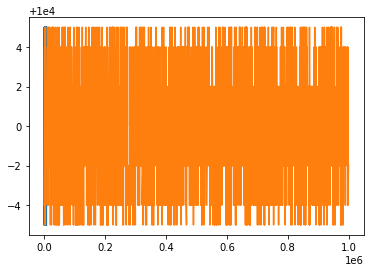

In [195]:
new_df.price.plot()
plt.plot('timestamp', 'price', data = new_df.query('day == -2'))
plt.show()

In [205]:
new_df.groupby('price')['quantity'].sum()

price
9995.0     1558
9996.0     2061
9998.0     4013
10000.0     137
10002.0    3939
10004.0    2017
10005.0    1512
Name: quantity, dtype: int64

In [187]:
new_df

Index(['timestamp', 'buyer', 'seller', 'symbol', 'currency', 'price',
       'quantity', 'day', 'total_seashells', 'avg_price', 'product',
       'bid_price_1', 'bid_volume_1', 'bid_volume_2', 'bid_volume_3',
       'ask_price_1', 'ask_volume_1', 'ask_volume_2', 'ask_volume_3',
       'mid_price', 'profit_and_loss'],
      dtype='object')